## Gordon Huang
### 3/10/24
### CYPLAN 255

# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

1. I want to demonstrate the correlation between different types of power plants in California and demographics (race, ethnicity, income). 
2. I will be using California Energy Commission (CEC) power plant data and the U.S. Census demographic information.
3. I filtered missing data. There are no outliers in my dataset.
4. I used groupby to summarize power plant capacity by energy source and operator.
5. I visualized power plant capacity by energy source and operator using barplots.
6. Natural gas power plants in California rank top in the number of capacity, totaling 62,395.94 MW including decommissioned projects. Additionally, the Los Angeles Department of Water and Power operates 10,142.85 MW of power plant capacity in its entirety, including decommissioned projects.
7. My project looks at California's census blocks in relation to power plant siting. My project will look at census block demographic information and its correlation to power plants such as natural gas power plants or solar photovoltatic power plants. I am in the process of figuring out how to iterate through each row of my power plants dataset and create a new column which captures the census FIPS code. Once I am able to assign each power plant a FIPS code using the census API, I can include demographic variables such as race, ethnicity, and income. I plan to create an indicator which looks at the proportion of the population which are not white to represent diversity. 

In [157]:
import pandas as pd
import json    
import requests
import pprint
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pp = pprint.PrettyPrinter

In [4]:
# API of CEC's power plant location dataset
endpoint_url = "https://services3.arcgis.com/bWPjFyq029ChCGur/arcgis/rest/services/Power_Plant/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

In [31]:
# Extract data
response = requests.get(endpoint_url)
data = json.loads(response.text)
data
powerplants = data['features']
powerplants[0]

{'type': 'Feature',
 'id': 1865,
 'geometry': {'type': 'Point',
  'coordinates': [-119.56790556527, 36.1371746042943]},
 'properties': {'OBJECTID': 1865,
  'CECPlantID': 'S0335',
  'PlantName': 'Corcoran 2 Solar LLC CED',
  'Retired_Plant': 0,
  'OperatorCompanyID': 'CED California Holdings LLC',
  'County': 'Kings',
  'Capacity_Latest': 19.8,
  'Units': '1',
  'PriEnergySource': 'SUN',
  'StartDate': 1433894400000}}

In [66]:
# Transform JSON to tabluar DF
d = {
    'CECID': [p['properties']['CECPlantID'] for p in powerplants],
    'PlantName': [p['properties']['PlantName'] for p in powerplants],
    'Retired': [p['properties']['Retired_Plant'] for p in powerplants],
    'Operator': [p['properties']['OperatorCompanyID'] for p in powerplants],
    'County': [p['properties']['County'] for p in powerplants],
    'Capacity': [p['properties']['Capacity_Latest'] for p in powerplants],
    'Units': [p['properties']['Units'] for p in powerplants],
    'Energy Source': [p['properties']['PriEnergySource'] for p in powerplants],
    'Date of Operation': [p['properties']['StartDate'] for p in powerplants],
    'Longitude': [p['geometry']['coordinates'][0] for p in powerplants],
    'Latitude': [p['geometry']['coordinates'][1] for p in powerplants],
}
df = pd.DataFrame.from_dict(d)
# UNIX to YMD
df['Date of Operation'] = df['Date of Operation'].astype("datetime64[ms]")

In [114]:
df

,CECID,PlantName,Retired,Operator,County,Capacity,Units,Energy Source,Date of Operation,Longitude,Latitude
0,S0335,Corcoran 2 Solar LLC CED,0,CED California Holdings LLC,Kings,19.8,1,SUN,2015-06-10,-119.567906,36.137175
1,S0520,Corcoran 3 Solar,0,CED California Holdings LLC,Kings,20.0,Unit 1,SUN,2016-02-11,-119.579725,36.144324
2,C0007,Hanford - Retired October 2011,1,Hanford LP,Kings,24.0,GEN 1,PC,1990-09-01,-119.648404,36.269645
3,G0832,Hanford Energy Park Peaker,0,"MRP San Joaquin Energy, LLC",Kings,92.0,"1, 2",NG,2001-09-01,-119.647450,36.270313
4,S0608,Exeter Solar,0,Tulare PV I LLC,Tulare,3.5,ES,SUN,2014-02-12,-119.128338,36.266303
...,...,...,...,...,...,...,...,...,...,...,...
1797,S0571,Lemoore PV 1 LLC,0,Lemoore PV 1 LLC,Kings,1.5,Unit 1,SUN,2016-01-29,-119.797348,36.257775
1798,S0225,Guernsey Solar Station,0,Pacific Gas & Electric (PG&E),Kings,20.0,1,SUN,2013-09-18,-119.650488,36.164281
1799,S0249,Corcoran LLC CED,0,CED California Holdings LLC,Kings,20.0,1,SUN,2013-08-13,-119.573740,36.142176
1800,S0317,Corcoran Irrigation District Solar LLC,0,Onward Energy,Kings,20.0,1,SUN,2014-12-22,-119.581404,36.141331


In [115]:
# Account for missing data or outliers
df.describe()

,Retired,Capacity,Date of Operation,Longitude,Latitude
count,1802.000000,1802.000000,1802,1802.000000,1802.000000
mean,0.129301,68.161809,1997-08-06 00:46:20.910000,-119.346695,36.084356
min,0.000000,0.150000,1899-01-01 00:00:00,-124.208602,32.562473
25%,0.000000,1.500000,1986-10-29 00:00:00,-121.303407,34.140361
50%,0.000000,8.400000,2010-06-23 12:00:00,-119.144869,35.577771
75%,0.000000,43.350000,2013-12-31 00:00:00,-117.855959,37.881918
max,1.000000,5664.000000,2021-12-22 00:00:00,-112.579910,41.985593
std,0.335626,249.911353,NaN,2.116342,2.197837


In [122]:
df.isnull().sum()

CECID                0
PlantName            4
Retired              0
Operator             0
County               4
Capacity             0
Units                0
Energy Source        0
Date of Operation    0
Longitude            0
Latitude             0
dtype: int64

In [127]:
df[df["PlantName"].isnull()]

,CECID,PlantName,Retired,Operator,County,Capacity,Units,Energy Source,Date of Operation,Longitude,Latitude
787,W0470,None,0,Terra-Gen Operating Company,None,131.10,WPRS 1,WND,2020-01-01,-118.272262,35.051409
788,W0474,None,0,Foundation Windpower,None,1.79,WPRS 1,WND,2020-09-11,-121.453579,36.503968
789,W0475,None,0,Foundation Windpower,None,1.79,WPRS 1,WND,2020-09-11,-121.370702,36.474217
790,W0476,None,0,Foundation Windpower,None,1.79,WPRS 1,WND,2018-09-01,-121.350779,36.457531


In [128]:
df = df.dropna()

In [177]:
capacity_es = df.groupby("Energy Source")[["Capacity"]].sum().reset_index().sort_values(by = "Capacity", ascending = False)
capacity_es

,Energy Source,Capacity
11,NG,62395.94
21,SUN,16498.45
22,WAT,15873.48
25,WND,13486.16
13,NUC,4577.00
8,GEO,2956.04
3,BIT,2121.10
20,SUB,1636.20
23,WDS,959.35
9,LFG,476.75


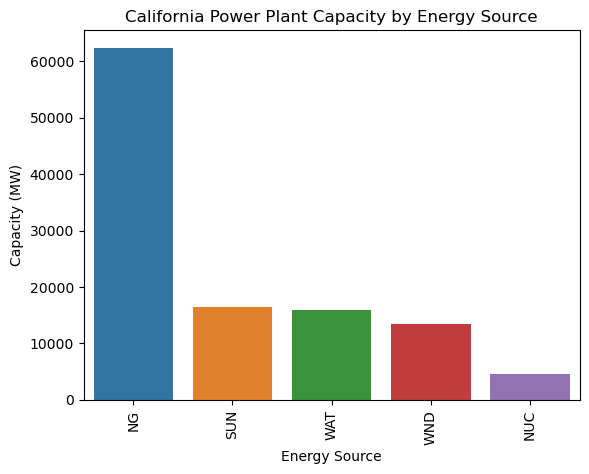

In [194]:
capacity_es_head = capacity_es.head()
g = sns.barplot(data=capacity_es_head, x='Energy Source', y='Capacity', hue = 'Energy Source')
plt.xticks(rotation=90)
plt.ylabel("Capacity (MW)")
plt.title("California Power Plant Capacity by Energy Source");

In [197]:
capacity_op = df.groupby("Operator")[["Capacity"]].sum().reset_index().sort_values(by = "Capacity", ascending = False)
capacity_op_head = capacity_op.head()
capacity_op

,Operator,Capacity
273,Los Angeles Department of Water & Power (LADWP),10142.85
358,Pacific Gas & Electric (PG&E),8237.52
337,Not Available,7053.85
453,Southern California Edison (SCE),6548.94
497,United States Bureau of Reclamation,4054.65
...,...,...
15,Alliance Star Energy LLC,1.00
374,PureGen Power,1.00
457,St Luke Medical Center,1.00
395,Saddleback Community College,0.82


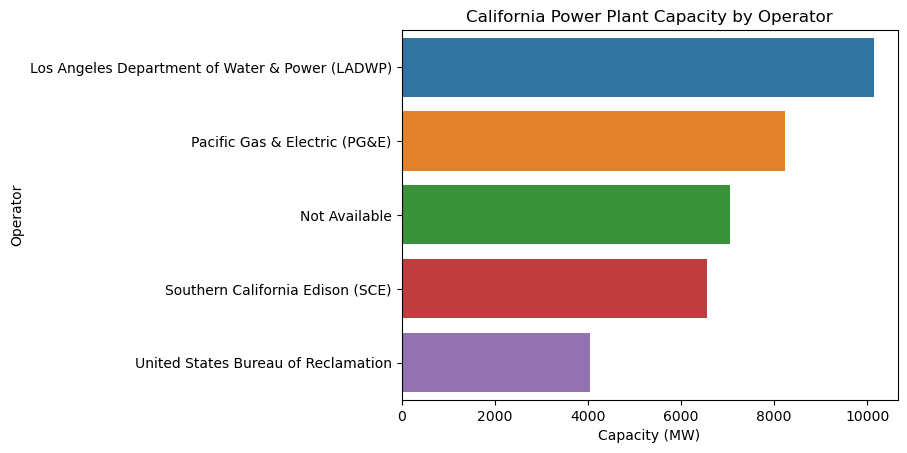

In [195]:
o = sns.barplot(data=capacity_op_head, y='Operator', x='Capacity', hue = 'Operator')
plt.xlabel("Capacity (MW)")
plt.title("California Power Plant Capacity by Operator");

In [24]:
lat = 37.761216
lon = -122.396965
url = 'https://geo.fcc.gov/api/census/block/find?latitude={0}&longitude={1}&format=json'.format(lat, lon)
response = requests.get(url)
data = response.json()
data

{'Block': {'FIPS': '060310013002003',
  'bbox': [-119.572017, 36.13663, -119.563119, 36.137939]},
 'County': {'FIPS': '06031', 'name': 'Kings County'},
 'State': {'FIPS': '06', 'code': 'CA', 'name': 'California'},
 'status': 'OK',
 'executionTime': '0'}

In [209]:
lat = df["Latitude"][0]
lon = df["Longitude"][0]
url = 'https://geo.fcc.gov/api/census/block/find?latitude={0}&longitude={1}&format=json'.format(lat, lon)
response = requests.get(url)
data = response.json()
data#['Block']['FIPS']

{'Block': {'FIPS': '060310013002003',
  'bbox': [-119.572017, 36.13663, -119.563119, 36.137939]},
 'County': {'FIPS': '06031', 'name': 'Kings County'},
 'State': {'FIPS': '06', 'code': 'CA', 'name': 'California'},
 'status': 'OK',
 'executionTime': '0'}

In [210]:
def block_fips(lat,long):
    url = 'https://geo.fcc.gov/api/census/block/find?latitude={0}&longitude={1}&format=json'.format(lat, long)
    response = requests.get(url)
    data = response.json()
    return data['Block']['FIPS']

In [213]:
# define parameters of our API query
acs_var = 'B01001_001E'  # total pop
state = '06'  # CA
counties = ['029']  # King County
year = 2020

# format the URL
counties_str = ''.join(counties)
url = "https://api.census.gov/data/{0}/acs/acs5?get={1}&for=county:{2}&in=state:{3}".format(
    year, acs_var, counties_str, state)

# execute the HTTP request
res = requests.get(url)
pd.DataFrame(res.json())

,0,1,2
0,B01001_001E,state,county
1,892458,06,029


In [214]:
import os
from census import Census
from us import states

# I store my API key stored as an environment variable rather than a .json file
census_key = os.getenv("CENSUS_API")  

c = Census(census_key, year=year)
res = c.acs5.get((
    'NAME', acs_var), {
    'for': 'county:{}'.format(counties_str),
    'in': 'state:{}'.format(states.CA.fips)
})

pd.DataFrame(res)

,NAME,B01001_001E,state,county
0,"Kern County, California",892458.0,06,029


In [215]:
acs_df = pd.DataFrame()

for year in range(2010, 2020):
    c = Census(census_key, year=year)
    res = c.acs1.get((
        'NAME', acs_var), {
        'for': 'county:{}'.format(counties_str),
        'in': 'state:{}'.format(states.CA.fips)
    })

    year_df = pd.DataFrame(res)
    year_df['year'] = year
    acs_df = pd.concat((acs_df, year_df), ignore_index=True)

<Axes: xlabel='year', ylabel='B01001_001E'>

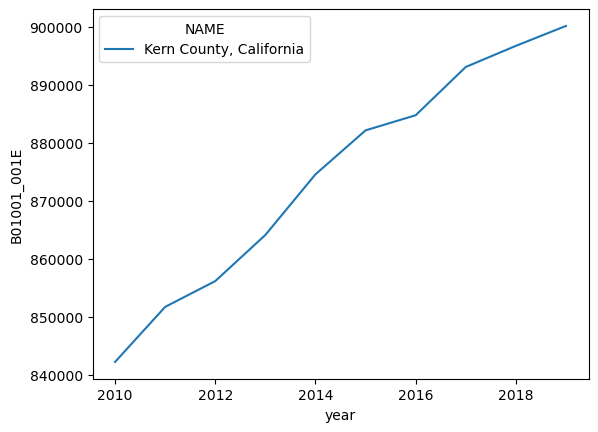

In [217]:
sns.lineplot(data=acs_df, x='year', y=acs_var, hue='NAME')